This demo model is a Convolutional Neural Network (CNN) designed to perform image classification on plant leaves to detect plant diseases. It uses the PlantVillage dataset, which contains thousands of labeled images of healthy and diseased leaves across various crops.

Problem Considered:
Given a plant leaf image, predict the type of disease (if any) present.

Leaf Image -> Preprocessing -> CNN Model -> Softmax Prediction -> Disease Label


In [ ]:
# CNN Model for Plant Disease Detection using GitHub Dataset in Google Colab

# Step 1: Clone the Dataset from GitHub
# This is a publically available dataset on Github: https://github.com/spMohanty/PlantVillage-Dataset

!git clone https://github.com/spMohanty/PlantVillage-Dataset.git



Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163235, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163235 (delta 2), reused 0 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163235/163235), 2.00 GiB | 41.07 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Updating files: 100% (182401/182401), done.


In [ ]:
# Step 2: Inspect Folder Structure in Git and list in Colab
import os
os.listdir("PlantVillage-Dataset/raw/color")

# Step 3: Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 4: Data Preprocessing

# 1. Dataset Preparation
# Source: GitHub repo PlantVillage-Dataset
# Folder Structure:
# Each subfolder is a class (e.g., Tomato___Late_blight, Apple___Black_rot, etc.)
# Split: 80% training, 20% validation

# 2. Image Preprocessing
# Resizes images to 128x128
# Normalizes pixel values to the range [0, 1]

img_size = (128, 128)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    "PlantVillage-Dataset/raw/color",
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    "PlantVillage-Dataset/raw/color",
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [ ]:
# Step 5: Define CNN Model

# Components set:
# 1. Conv2D: Detects features like edges, textures, and shapes
# 2. MaxPooling2D: Reduces dimensionality and keeps key features
# 3. Flatten: Converts 2D features into 1D
# 4. Dense: Learns class-specific combinations of features
# 5. Softmax: Outputs probabilities for each disease class

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Model Training:
# Uses Categorical Crossentropy as the loss function
# Optimizer: Adam
# Trains on ~80% of the data, validates on the rest

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,525,798 (24.89 MB)

 Trainable params: 6,525,798 (24.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train the Model

history = model.fit(
    train_generator,
    epochs=5,  # Can increase for better performance
    validation_data=val_generator
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.4483 - loss: 2.0515 - val_accuracy: 0.8141 - val_loss: 0.6031
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 69s 51ms/step - accuracy: 0.7647 - loss: 0.7582 - val_accuracy: 0.8811 - val_loss: 0.3835
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 58s 42ms/step - accuracy: 0.8319 - loss: 0.5288 - val_accuracy: 0.8887 - val_loss: 0.3433
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.8654 - loss: 0.4203 - val_accuracy: 0.9112 - val_loss: 0.2774
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 56s 41ms/step - accuracy: 0.8975 - loss: 0.3209 - val_accuracy: 0.9233 - val_loss: 0.2413


In [ ]:
# Step 7: Save the Model

# Saves the trained model to .h5 format

model.save("plant_disease_cnn_model.h5")

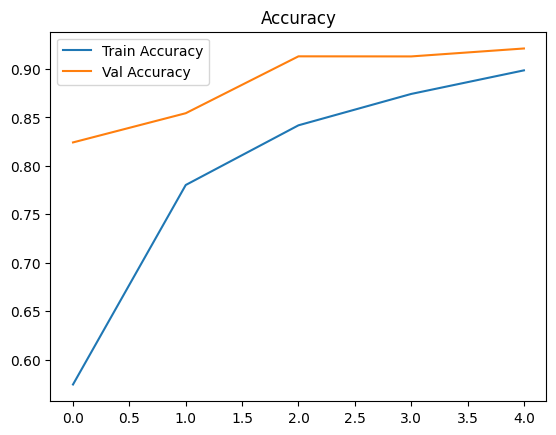

In [ ]:
# Step 8: Plot Accuracy and Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
# Step 9: Load and Test a Single Image
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

class_indices = train_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())

for fn in uploaded.keys():
    img = image.load_img(fn, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = labels[np.argmax(prediction)]
    print(f"{fn} -> Predicted: {predicted_class}")

Saving rot_img2.JPG to rot_img2.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
rot_img2.JPG -> Predicted: Potato___Late_blight
